<a href="https://colab.research.google.com/github/Zoro114/mne/blob/main/Compute_CSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 7.5 MB/s 


In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import csd_fourier,csd_multitaper,csd_morlet

In [5]:
data_path=mne.datasets.sample.data_path()
raw_fif=data_path /'MEG'/'sample'/'sample_audvis_raw.fif'
event_fif=data_path /'MEG'/'sample'/'sample_audvis_raw-eve.fif'
events=mne.read_events(event_fif)
raw=mne.io.read_raw_fif(raw_fif,preload=True)

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [8]:
picks=mne.pick_types(raw.info,meg='grad')
epochs=mne.Epochs(raw,events,event_id=1,tmin=-0.2,tmax=1,picks=picks,reject=dict(grad=4000e-13),preload=True)

Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Using data from preloaded Raw for 72 events and 722 original time points ...
0 bad epochs dropped


In [9]:
csd_fft=csd_fourier(epochs,fmin=15,fmax=20)
csd_mlt=csd_multitaper(epochs,fmin=15,fmax=20,adaptive=True)

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/72 [00:00<?,       ?it/s]

[done]
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
    Using multitaper spectrum estimation with 7 DPSS windows
Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/72 [00:00<?,       ?it/s]

[done]


In [11]:
frequencies=[16,17,18,19,20]
csd_wav=csd_morlet(epochs,frequencies,decim=10)

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/72 [00:00<?,       ?it/s]

[done]


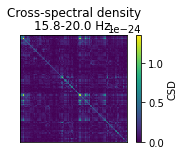

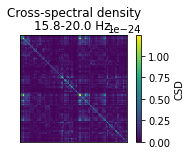

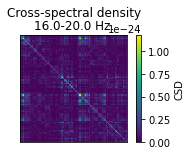

[<Figure size 216x158.4 with 2 Axes>]

In [13]:
csd_fft.mean().plot()
csd_mlt.mean().plot()
csd_wav.mean().plot()